In [12]:
# インポートはここで完結させる
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

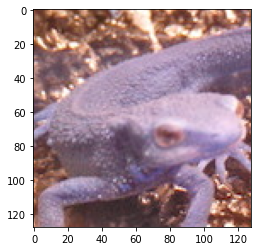

In [13]:
# 画像を読み込む(BGRで読み込む)
img = cv2.imread("data/imori.jpg")
# BGRで表示する．
plt.imshow(img)

In [14]:
# モーションフィルタ
def motion_filter(img, K_size=3):
    #　高さ(H)　幅(W)　チャンネル(C)
    H, W, C = img.shape
    
    # Kernel
    # [
    #  1/3, 0, 0
    #  0, 1/3, 0
    #  0, 0, 1/3
    # ]
    K = np.diag( [1] * K_size ).astype(np.float)
    K /= K_size

    ## ゼロパディング
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2,うぶ C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

    tmp = out.copy()

    # フィルタリング
    for y in range(H):
        for x in range(W):
            for c in range(C):
                # 平均値を出力
                out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])

    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

    return out

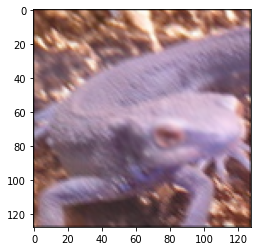

In [15]:
out = motion_filter(img, K_size=3)
plt.imshow(out)